# Metehan Gelgi

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Parameters

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([[+0.0, +2.5], 
                        [-2.5, -2.0], 
                        [+2.5, -2.0]])
# covariance parameters
class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, +0.8], 
                               [+0.8, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]]])
# sample sizes
class_sizes = np.array([120, 80, 100])

## Data Generation

In [3]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Exporting Data

In [4]:
# write data to a file
np.savetxt("HW03_data_set.csv", np.hstack((X, y[:, None])), fmt = "%f,%f,%d")

## Plotting Data

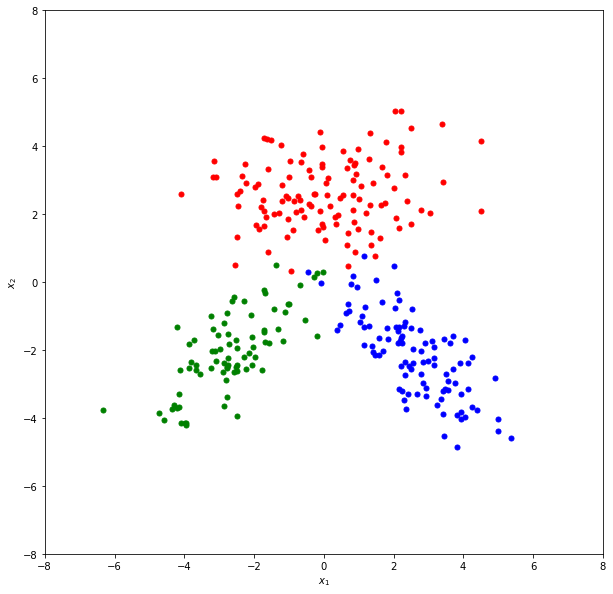

In [5]:
# plot data points generated
plt.figure(figsize = (10, 10))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlim((-8, +8))
plt.ylim((-8, +8))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Importing Data

In [6]:
# read data into memory
data_set = np.genfromtxt("HW03_data_set.csv", delimiter = ",")

# get X and y values
X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(int)

# get number of classes and number of samples
K = np.max(y_truth)
N = data_set.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

## Sigmoid Function

$S(x) = \dfrac{1}{1+e^{-\alpha x}}$

In [7]:
# define the sigmoid function
def sigmoid(x, W, wo):
    return 1/(1+np.exp(-(np.matmul(x, W)+wo)))

## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}_{c}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{c0}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic}) 
\end{align*}

In [8]:
# define the gradient functions
#yaptığım 
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.matmul(Y_truth[:,c] - Y_predicted[:,c], X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

# olması gereken 
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat(((Y_truth[:,c] - Y_predicted[:,c])* Y_predicted[:,c]*(1 - Y_predicted[:,c]))[:, None]
                                         ,X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum((Y_truth - Y_predicted)*Y_predicted*(1 - Y_predicted), axis = 0))

## Algorithm Parameters

In [9]:
# set learning parameters
eta = 0.01
epsilon = 0.001

## Parameter Initialization

In [10]:
# randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm

$\textrm{Error} = 0.5\sum\limits_{i = 1}^{N} \sum\limits_{c = 1}^{K} (y_{ic}-\hat{y}_{ic})^2$

In [11]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    Y_predicted = sigmoid(X, W, w0)

    objective_values = np.append(objective_values, 0.5*np.sum((Y_predicted - Y_truth)**2))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

In [12]:
print(W)
print(w0)

[[-0.42756732 -2.52794134  2.8929295 ]
 [ 4.48391775 -2.29095954 -2.69298624]]
[[-2.41798868 -3.3718741  -3.20890584]]


## Convergence

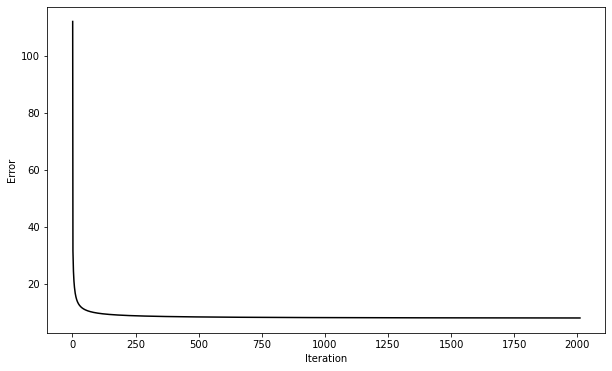

In [13]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Performance

In [17]:
Y_predicted

array([[9.99983284e-01, 2.58242432e-07, 1.46728810e-03],
       [9.99697648e-01, 4.90818233e-04, 2.46443191e-05],
       [9.78591710e-01, 3.93141313e-06, 2.13106237e-01],
       [9.99757049e-01, 1.97870672e-02, 5.48219633e-07],
       [9.73556633e-01, 3.79379869e-05, 3.74652720e-02],
       [9.99999237e-01, 3.54783610e-03, 5.38561486e-09],
       [9.99999596e-01, 1.17504462e-06, 5.91528265e-06],
       [9.89550418e-01, 1.58931439e-03, 3.84392564e-04],
       [9.99887981e-01, 3.84671436e-07, 7.92503061e-03],
       [9.99994254e-01, 2.07648852e-07, 5.64733857e-04],
       [9.99201461e-01, 1.31842849e-02, 2.98589110e-06],
       [9.98954461e-01, 2.66604826e-02, 2.01200423e-06],
       [9.98828815e-01, 3.05028856e-05, 1.55388284e-03],
       [9.99977450e-01, 3.41760254e-05, 1.87291743e-05],
       [9.99999906e-01, 7.57737012e-05, 2.20817464e-08],
       [9.95016511e-01, 7.55809860e-04, 3.47957066e-04],
       [9.99417858e-01, 1.36675427e-03, 1.88362637e-05],
       [9.99999386e-01, 2.85268

In [14]:
# calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        119   4   3
2          1  76   0
3          0   0  97


## Visualization

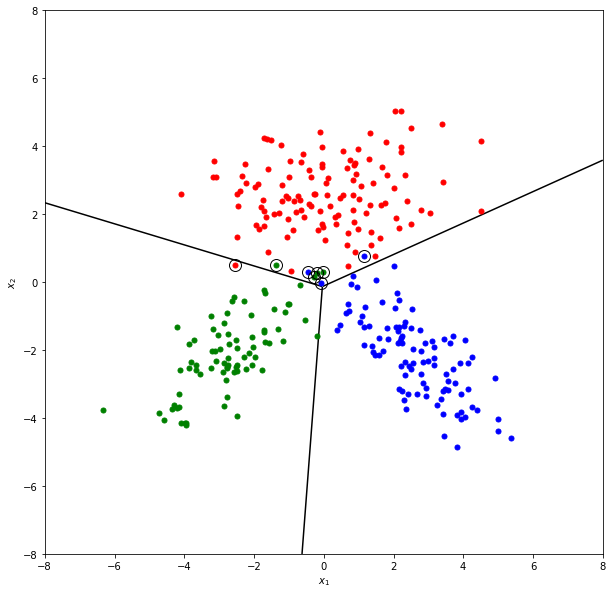

In [16]:
# evaluate discriminant function on a grid
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = W[0, c] * x1_grid + W[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()